# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [145]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [33]:
# your answer here
employee = pd.read_csv("data/Employee.csv")


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [28]:
# Method 1
# your answer here
employee.groupby(["Department"])["Salary"].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [30]:
# Method 2
# your answer here
pd.pivot_table(employee, values=["Salary"], columns=["Department"])

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [32]:
# your answer here
pd.pivot_table(employee, values=["Salary"], columns=["Department", "Title"]).T

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [66]:
# your answer here
pd.pivot_table(employee, values=["Salary"], columns=["Years"], index= ["Title"])


Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [108]:
# your answer here
pd.pivot_table(employee, values=["Salary"],
               columns=["Department", "Title"],
                aggfunc={"Salary":np.mean,
                        "Title": "count"}).T.rename(columns={"Title": "Number_employees"})

Salary  Number_employees
Department Title                              
HR         VP           70.0               1.0
           analyst      32.5               2.0
IT         VP           70.0               1.0
           analyst      32.5               2.0
           associate    60.0               1.0
Sales      associate    55.0               2.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [113]:
# your answer here
pd.pivot_table(employee, values=["Salary"], columns=["Department", "Title"], aggfunc={"Salary":[np.median, min, max, np.std]}).T
# Standard deviation for "VP" and "Associate" in "HR" and "IT" are NaN because there is only one value on salary column.

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [115]:
# your answer here
pd.pivot_table(employee, values=["Salary"], columns=["Department", "Title"], aggfunc={"Salary":[np.median, min, max, np.std]}).T.fillna(0)


Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0  0.000000
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0  0.000000
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0  0.000000
Sales      associate   55.0   55.0  55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [124]:
# your answer here
pd.pivot_table(employee, values = ["Salary"],
                columns= ["Department", "Title"],
                aggfunc={ "Salary": "sum",
                        "Title": "count"}).T.rename(columns={"Salary": "Salary_exp", 
                                                            "Title": "Num_employees"})

Salary_exp  Num_employees
Department Title                               
HR         VP                 70              1
           analyst            65              2
IT         VP                 70              1
           analyst            65              2
           associate          60              1
Sales      associate         110              2

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [126]:
# your answer here
pd.pivot_table(employee, values = ["Salary","Years"],
                columns= ["Department", "Title"],
                aggfunc={ "Salary": "mean",
                        "Years": "sum"}).T.rename(columns={"Salary": "Mean_salary", 
                                                            "Years": "Total_years"})

Mean_salary  Total_years
Department Title                              
HR         VP                70.0          8.0
           analyst           32.5          6.0
IT         VP                70.0          8.0
           analyst           32.5          3.0
           associate         60.0          7.0
Sales      associate         55.0          5.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [171]:
# your answer here

# define the function to remove the max salary
def mean_without_max(salaries):
    max_salary = salaries.max()
    return (salaries.sum() - max_salary) / (salaries.count() - 1)

# create the pivot table and apply the function
mean_salary = pd.pivot_table(employee, values = ["Salary"],  columns = ["Department"], aggfunc=mean_without_max).T
print(mean_salary)



               Salary
Department           
HR          32.500000
IT          41.666667
Sales       55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [172]:
# your answer here

fitbit = pd.read_csv("data/Fitbit.csv")


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [176]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [175]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [177]:
# your answer here
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

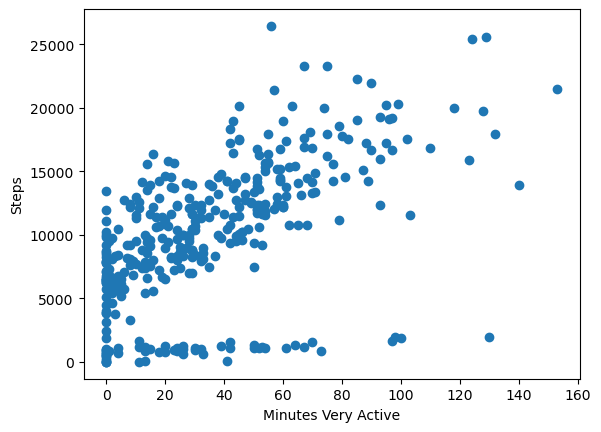

In [182]:
# your answer here
plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")

plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
# A correlation coefficient of 0.571 suggests that there is a moderate positive correlation between Minutes Very Active and Steps.
# This means that as the number of Minutes Very Active increases, the number of Steps taken also tends to increase.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [183]:
# your answer here
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])


0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

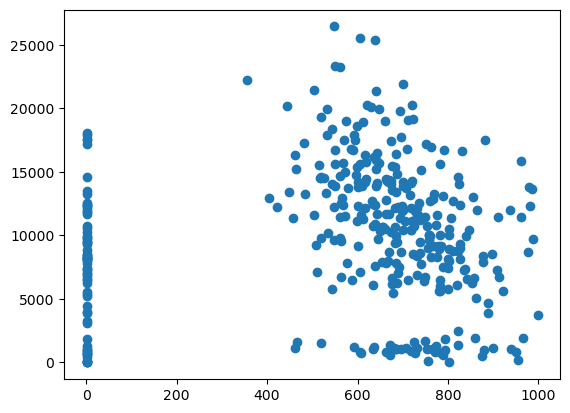

In [186]:
# your answer here
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.show()

# A correlation coefficient of 0.0769 suggests that there is almost no correlation between Minutes sedentary and Steps.
# This means that the changes in number of Minutes sedentary has almost no effects in the number of Steps taken.


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [187]:
# your answer here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])


0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

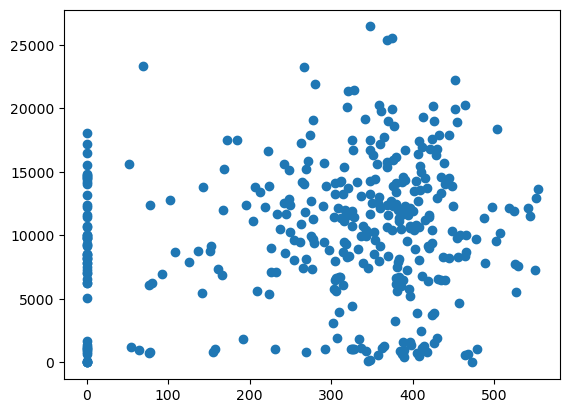

In [189]:
# your answer here
plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.show()

# A correlation coefficient of 0.131 suggests that there is very low positive correlation between Minutes of sleep and Steps.
# This means that the changes in number of Minutes sleep has almost very low effects in the number of Steps taken in the same direction.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

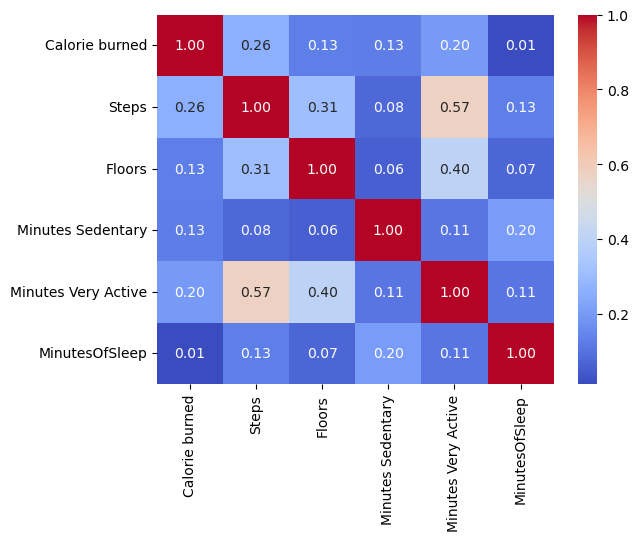

In [200]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
fitbit_subset = fitbit[column]
corr_matrix = fitbit_subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='0.2f')
plt.show()



#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [205]:
# your answer here
corr_matrix["Steps"].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [128]:
# your answer here
time_grades = pd.read_csv("data/Time_Grades.csv")

#### Show visually the frequency distribution of the time_grades dataset.

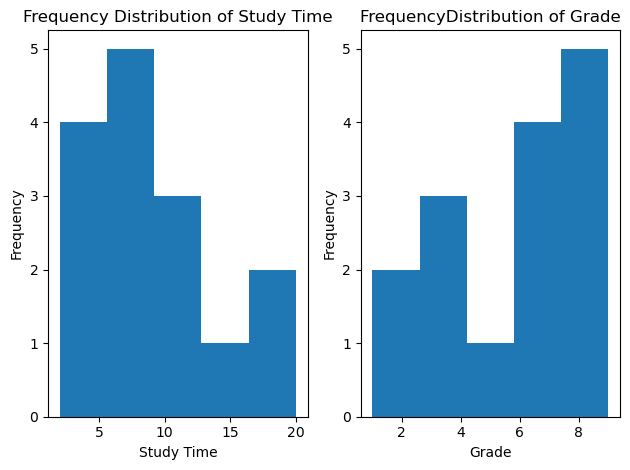

In [139]:
# your answer here
# Histogram of study time column
plt.subplot(1,2,1)
plt.hist(time_grades["Study time"], bins = 5)
plt.xlabel("Study Time")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Study Time")

# Histogram of grade column
plt.subplot(1,2,2)
plt.hist(time_grades["Grade"], bins = 5)
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title("FrequencyDistribution of Grade")

plt.tight_layout()
plt.show()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [153]:
# your answer here
print(f"Pearson correaltion : {stats.pearsonr(time_grades['Study time'], time_grades['Grade'])[0]}")
print(f"Spearmean correlation: {stats.spearmanr(time_grades['Study time'], time_grades['Grade'])[0]}")

## the Pearson correlation coefficient is 0.798 and the Spearman rank correlation coefficient is 0.820. Both coefficients are positive and close to 1,
# which suggests a strong positive relationship between the two variables. This means that as one variable increases,
#  the other variable also tends to increase.


Pearson correaltion : 0.7980456073578857
Spearmean correlation: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?


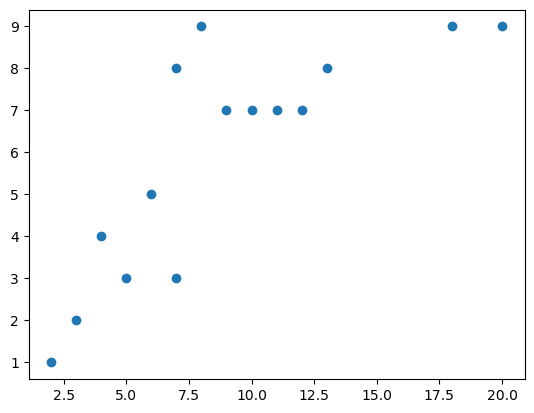

In [155]:
# your answer here
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.show()

# From the both correlation and the scatter plot we can say that the student grades are highly correlated with the study time.
# The more student spend time on study the better the grades. However, it's also possible that the relationship is spurious and caused by a third variable or a coincidence.
# So, inorder to draw the conclusion of whether the relation is casual or not  we need to analyse with bigger sample. 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [206]:
# your answer here
# The Pearson correlation coefficient and the Spearman rank correlation coefficient are both measures of the linear relationship between two variables.
# The Pearson correlation coefficient measures the strength and direction of the linear relationship between two continuous variables,
# while the Spearman rank correlation coefficient measures the strength and direction of the monotonic relationship between two variables,
# which means the relationship doesn't have to be strictly linear.